In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import missingno as msno


/tmp/ipykernel_22205/2883003775.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('loan_project/SBAnational.csv')
df.head()

/tmp/ipykernel_22205/2284209477.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_project/SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
# Repérer les colonnes qui ont des valeurs manquantes

df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

<Axes: >

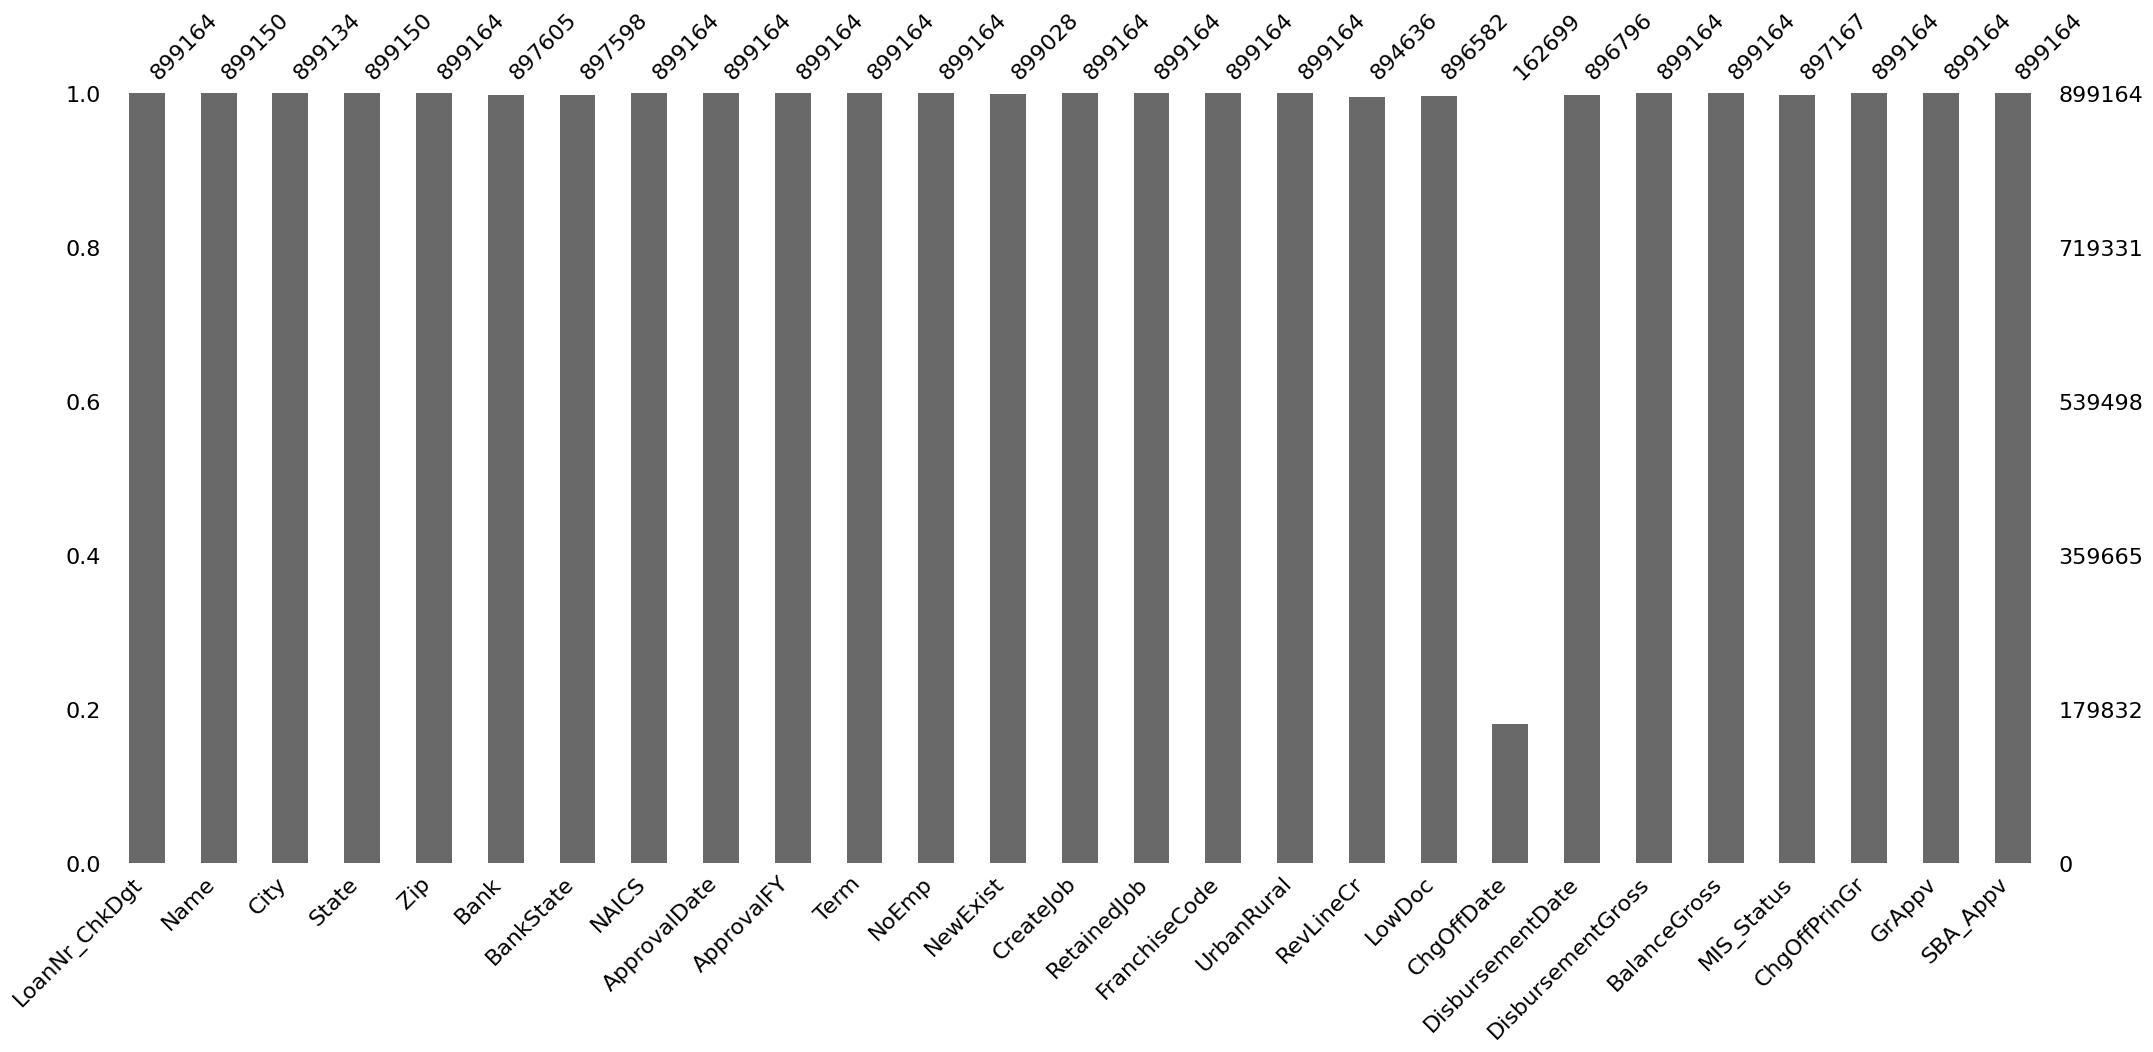

In [5]:
msno.bar(df)

<Axes: >

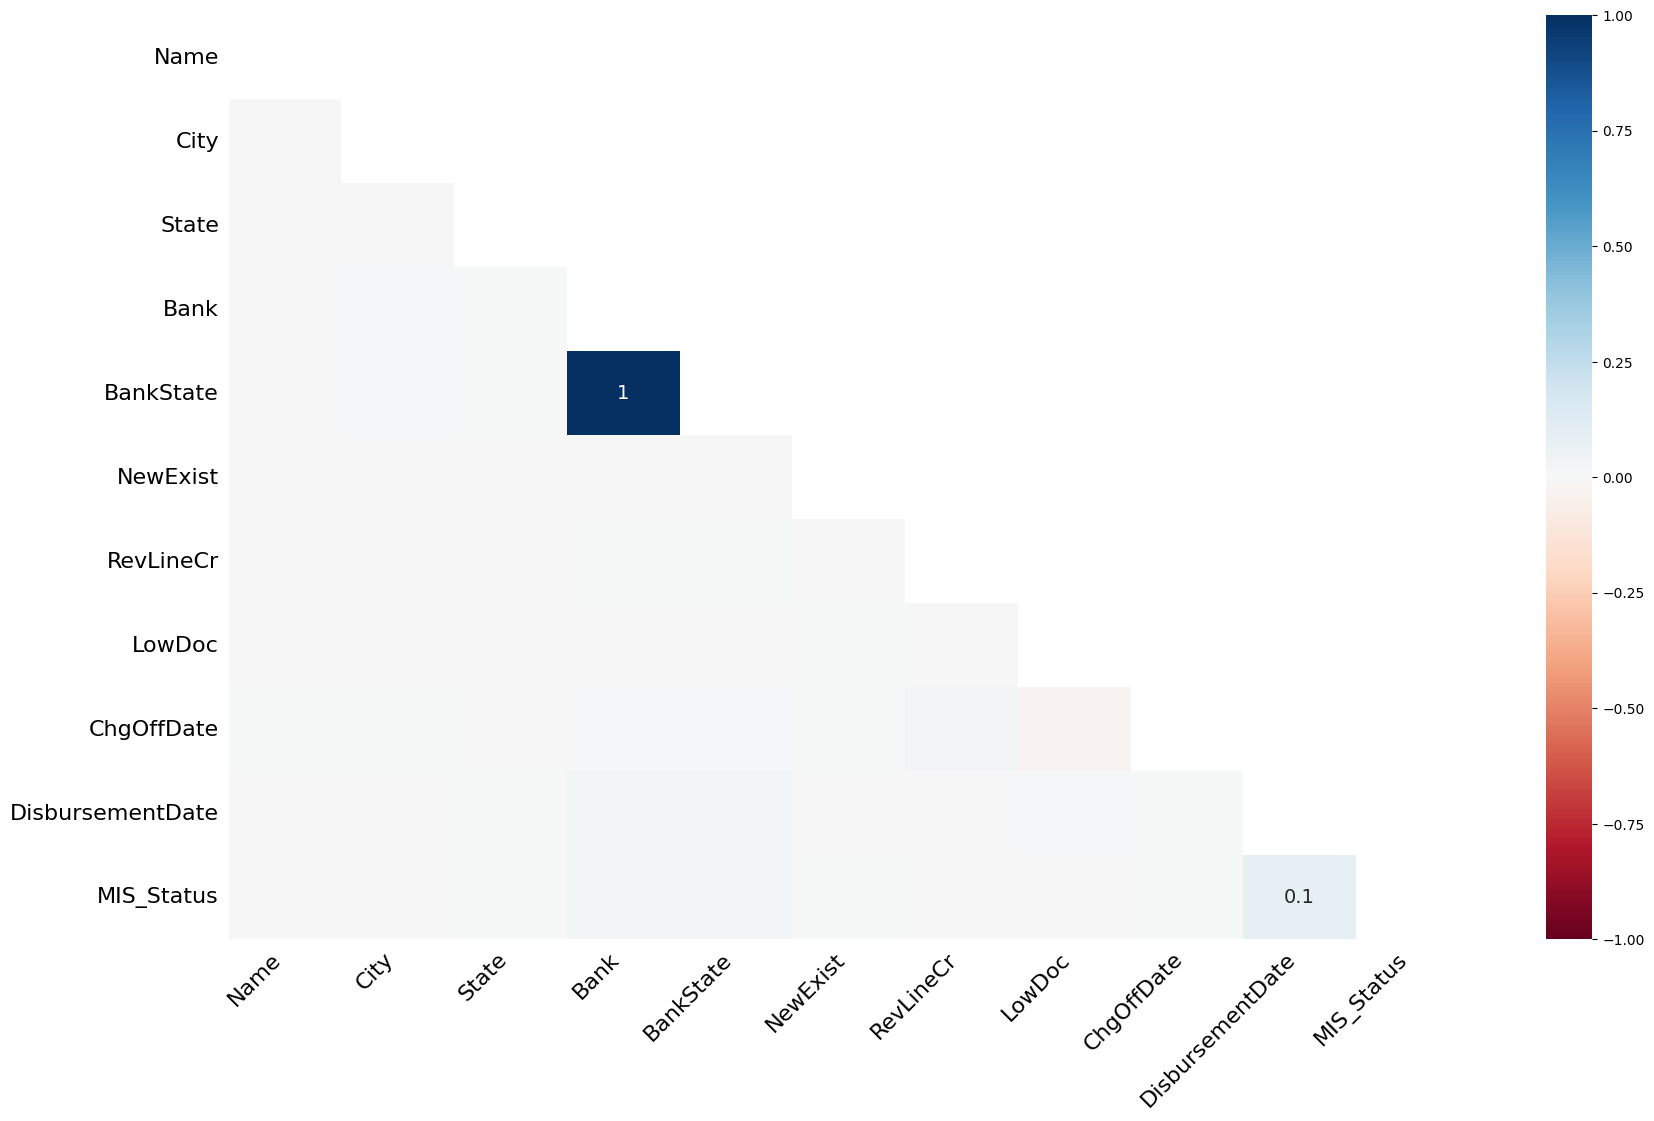

In [6]:
msno.heatmap(df)

In [7]:
df_model = df

In [8]:
# On drop les colonnes qui font du Target Leaking

df_model = df_model.drop(['Name','City','Bank','CreateJob','ApprovalDate','RetainedJob','ChgOffDate', 'DisbursementDate','DisbursementGross','BalanceGross','ChgOffPrinGr'],axis=1)
df_model

,LoanNr_ChkDgt,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,1000014003,IN,47711,OH,451120,1997,84,4,2.0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,1000024006,IN,46526,IN,722410,1997,60,2,2.0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,1000034009,IN,47401,IN,621210,1997,180,7,1.0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,1000044001,OK,74012,OK,0,1997,60,2,1.0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,1000054004,FL,32801,FL,0,1997,240,14,1.0,1,0,N,N,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,OH,43221,IL,451120,1997,60,6,1.0,1,0,0,N,P I F,"$70,000.00","$56,000.00"
899160,9995603000,OH,43221,IL,451130,1997,60,6,1.0,1,0,Y,N,P I F,"$85,000.00","$42,500.00"
899161,9995613003,CA,93455,CA,332321,1997,108,26,1.0,1,0,N,N,P I F,"$300,000.00","$225,000.00"
899162,9995973006,HI,96830,HI,0,1997,60,6,1.0,1,0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


In [9]:
# Elimine les erreurs qui ne sont pas des INT du type '1997A'
df_model['ApprovalFY'] = pd.to_numeric(df_model['ApprovalFY'], errors='coerce').astype('Int64')

# Retirer les dollars
df_model['GrAppv'] = pd.to_numeric(df_model['GrAppv'].str.replace('[\$,]', '', regex=True))
df_model['SBA_Appv'] = pd.to_numeric(df_model['SBA_Appv'].str.replace('[\$,]', '', regex=True))


# Remplace les valeurs étranges de 'RevLineCr' et 'LowDoc' par des Y et N
df_model['RevLineCr'] = df_model['RevLineCr'].replace(('0','T','`',',','1','C','3','2','R','7','A','5','.','4','-','Q'), np.nan)

# Si le montant du prêt est inférieur à 150 000$, il s'agit d'un LowDoc
condition_lowdoc = (df_model['GrAppv'] > 150000)
df_model.loc[condition_lowdoc, 'LowDoc'] = 'N'
df_model.loc[~condition_lowdoc, 'LowDoc'] = 'Y'

# Encode la target en binaire 
df_model['MIS_Status'] = df_model['MIS_Status'].replace(('CHGOFF','P I F'), (0,1))

# Encode la colonne 'FranchiseCode' en binaire, afin de séparer les franchisés et les non franchisés
condition_franchise = (df_model['FranchiseCode'] > 1)
df_model.loc[condition_franchise, 'FranchiseCode'] = 1
df_model.loc[~condition_franchise, 'FranchiseCode'] = 0


# Imputation
imputer = SimpleImputer(strategy='most_frequent')
df_model[['RevLineCr','LowDoc']] = imputer.fit_transform(df_model[['RevLineCr','LowDoc']])

imputer = SimpleImputer(strategy='most_frequent')
df_model[['ApprovalFY']] = imputer.fit_transform(df_model[['ApprovalFY']])

imputer = SimpleImputer(strategy='most_frequent')
df_model[['State','BankState','NewExist']] = imputer.fit_transform(df_model[['State','BankState','NewExist']])
df_model.isnull().sum()


/tmp/ipykernel_22205/2236682495.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model['MIS_Status'] = df_model['MIS_Status'].replace(('CHGOFF','P I F'), (0,1))


LoanNr_ChkDgt       0
State               0
Zip                 0
BankState           0
NAICS               0
ApprovalFY          0
Term                0
NoEmp               0
NewExist            0
FranchiseCode       0
UrbanRural          0
RevLineCr           0
LowDoc              0
MIS_Status       1997
GrAppv              0
SBA_Appv            0
dtype: int64

In [10]:
# Nettoyage de Farid

# nettoyage de la colonne State

missin_state_rows = df_model[df_model['State'].isnull()]
print(missin_state_rows[['Zip', 'State']])
print()

zip_values = missin_state_rows['Zip'].tolist()

print()
state_values_for_zip = []
for zip_value in zip_values:
    city_values_for_zip = df_model[df_model['Zip'] == zip_value]['State'].unique()
    state_values_for_zip.append(city_values_for_zip)

for i, zip_value in enumerate(zip_values):
    print(f"pour le {zip_value},  {state_values_for_zip[i]}")
print()


zip_state_pairs = [(8070,'NJ'),
                   (95682,'CA'),
                   (67219,'KS'),
                   (79925,'TX'),
                   (33410,'FL'),
                   (54205,'WI'),
                   (54025, 'MN'),
                   (84124,'UT'),
                   (65049,'MO'),
                   (75236,'TX'),
                   (76052,'TX'),
                   (76645,'TX'),

]

for zip_value, state_value in zip_state_pairs:
    df_model.loc[(df_model['Zip']== zip_value) & (df_model['State'].isnull()), 'State'] = state_value


# print(city_values_for_zip)

print()

# Traitement quand Zip == 0

# Remplacer les valeurs 0 par NaN pour faciliter le traitement
df_model['Zip'] = df_model['Zip'].replace(0, pd.NA)

# State quand Zip is Nan 
state_values_with_zip_0 = df_model.query('Zip.isna()')['State'].unique()
print(state_values_with_zip_0)

# Boucle pour itérer sur chaque état dans la liste
for state in state_values_with_zip_0:
    # Utiliser query pour filtrer les lignes correspondantes à l'état actuel et extraire les codes postaux uniques
    unique_zips_for_state = df_model.query('State == @state')['Zip'].unique()
    
    # Afficher l'état et les codes postaux correspondants
    print(f"État : {state}, Codes postaux uniques : {unique_zips_for_state}")

# Déterminer le code postal le plus fréquent pour chaque état
most_frequent_zip = df_model.groupby('State')['Zip'].transform(lambda x: x.mode()[0])

# Remplacer les valeurs NaN par le code postal le plus fréquent
df_model['Zip'].fillna(most_frequent_zip, inplace=True)


Empty DataFrame
Columns: [Zip, State]
Index: []




['OR' 'MO' 'WA' 'CA' 'WV' 'NY' 'FL' 'TX' 'IL' 'OK' 'AR' 'NC' 'VA' 'OH'
 'NM' 'GA' 'MN' 'CT' 'IA' 'AZ' 'IN' 'WI' 'NV' 'MT' 'CO' 'ID' 'PA' 'MS'
 'SC' 'MD' 'NH' 'RI' 'TN' 'UT' 'KY' 'KS' 'MA' 'NJ' 'SD' 'AL' 'NE' 'LA'
 'ME']
État : OR, Codes postaux uniques : [97008 <NA> 97015 97224 97034 97005 97128 97212 97217 97321 97478 97322
 97402 97386 97202 97114 97814 97035 97138 97232 97051 97204 97219 97037
 97520 97007 97215 97068 97701 97741 97211 97213 97030 97330 97401 97123
 97420 97055 97914 97223 97209 97603 97206 97707 97222 97417 97239 97601
 97501 97236 97027 97006 97214 97355 97504 97132 97062 97477 97227 97045
 97470 97218 97024 97338 97424 97220 97080 97702 97013 97216 97367 97038
 97459 97405 97444 97301 97302 97205 97303 97324 97221 97032 97140 97739
 97210 97070 97201 97526 97124 97503 97071 97103 97453 97463 97913 97370
 97058 97487 97116 97230 97113 97870 97031 97408 97534 97267 97305 97530
 97293 97753 97308 97760 97225 97527 

/tmp/ipykernel_22205/2212676975.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Zip'].fillna(most_frequent_zip, inplace=True)
/tmp/ipykernel_22205/2212676975.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model['Zip'].fillna(most_frequent_zip, inplace=True)


In [11]:
# nettoyage Bank 

# df_model['Bank'].head(1000)

# bank_state_counts = df_model.groupby('Bank')['BankState'].nunique()
# classement_bank = bank_state_counts.sort_values(ascending=False)
# print(classement_bank)

# correlation

df_model['BankState'].unique()
contingency_table = pd.crosstab(df_model['BankState'], df_model['State'])
print(contingency_table)

# chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# print(p_value)

# Qd BankState est Nan, connaitre les valeurs de State

states_with_nan_bankstate = df_model.query('BankState.isnull()')['State'].unique()
print(states_with_nan_bankstate)

# determiné la valeur de Bankstate la plus fréquente lorsque State contient une valeur de states_with_nan_bankstate

most_common_bank_states = {}

for state in states_with_nan_bankstate:
    filtered_df = df_model[df_model['State']== state]
    most_common_bank_state = filtered_df['BankState'].mode()
    most_common_bank_states[state] = most_common_bank_state

for state, bank_state in most_common_bank_states.items():
    print(f"Pour l'état {state} la valeur la plus fréquente de BankState est {bank_state}")
    df_model.loc[(df_model['State'] == state) & (df_model['BankState'].isnull()), 'BankState'] = bank_state.values[0]

# # Déterminer l'etat de le state le plus fréquent pour chaque bank state 
# most_frequent_state = df_model.groupby('State')['BankState'].transform(lambda x: x.mode()[0])
# print(most_frequent_state)


# # Remplacer les valeurs NaN par le code postal le plus fréquent
# df_model['Zip'].fillna(most_frequent_zip, inplace=True)



State        AK    AL    AR    AZ     CA    CO    CT   DC   DE     FL  ...  \
BankState                                                              ...   
AK         1414     1     0     3      2     1     0    0    0      0  ...   
AL            0  5395    97   441     43   311     3    0    1    990  ...   
AN            0     0     0     0      0     0     0    0    1      0  ...   
AR            3     9  4772     0      2     5     0    0    1      8  ...   
AZ            0     1     2  3709     58    19     0    0    0      2  ...   
CA          148   634   217  1920  76618  2009   415  481  130   3347  ...   
CO            3     4     1   185   1998  7620     1    1    7    119  ...   
CT            3     5     4    81    127    17  5486   10    2    201  ...   
DC            5     4    13    88   1305    95     9  192   12    189  ...   
DE            0    32     1     2      9     3   544   80  990    445  ...   
EN            0     0     0     0      0     0     0    0    0  

In [12]:
# Dictionnaire de correspondance des codes NAICS aux catégories
df_model['NAICS_Category'] = df_model['NAICS'].astype(str).str[:2]
df_model['NAICS_Category'] = df_model['NAICS_Category'].astype(int)



naics_categories = {
    '0' : 'Inconnue',
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}

# Appliquer la correspondance à la colonne contenant les deux premiers chiffres des codes NAICS
df_model['NAICS_Category'] = df_model['NAICS'].astype(str).str[:2].map(naics_categories)

# On drop la colonne NAICS
df_model = df_model.drop('NAICS', axis=1)

df_model.head(50)

,LoanNr_ChkDgt,State,Zip,BankState,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,NAICS_Category
0,1000014003,IN,47711,OH,1997.0,84,4,2.0,0,0,N,Y,1.0,60000.0,48000.0,Retail Trade
1,1000024006,IN,46526,IN,1997.0,60,2,2.0,0,0,N,Y,1.0,40000.0,32000.0,Accommodation and Food Services
2,1000034009,IN,47401,IN,1997.0,180,7,1.0,0,0,N,N,1.0,287000.0,215250.0,Health Care and Social Assistance
3,1000044001,OK,74012,OK,1997.0,60,2,1.0,0,0,N,Y,1.0,35000.0,28000.0,Inconnue
4,1000054004,FL,32801,FL,1997.0,240,14,1.0,0,0,N,N,1.0,229000.0,229000.0,Inconnue
5,1000084002,CT,6062,DE,1997.0,120,19,1.0,0,0,N,N,1.0,517000.0,387750.0,Manufacturing
6,1000093009,NJ,7083,SD,1980.0,45,45,2.0,0,0,N,N,0.0,600000.0,499998.0,Inconnue
7,1000094005,FL,34491,AL,1997.0,84,1,2.0,0,0,N,Y,1.0,45000.0,36000.0,Other Services (except Public Administration)
8,1000104006,FL,32456,FL,1997.0,297,2,2.0,0,0,N,N,1.0,305000.0,228750.0,Accommodation and Food Services
9,1000124001,CT,6073,CT,1997.0,84,3,2.0,0,0,N,Y,1.0,70000.0,56000.0,Inconnue


In [13]:
df_model.isnull().sum()

LoanNr_ChkDgt        0
State                0
Zip                  0
BankState            0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
MIS_Status        1997
GrAppv               0
SBA_Appv             0
NAICS_Category       0
dtype: int64

In [14]:
colonne_avec_zero = ['LoanNr_ChkDgt','State','Zip','BankState','ApprovalFY','Term','NoEmp','NewExist','FranchiseCode','UrbanRural','RevLineCr','LowDoc','GrAppv','SBA_Appv','NAICS_Category']

for i in colonne_avec_zero:
    nombre_de_zeros = (df_model[i] == 0).sum()
    print(f"Nombre de zéros dans la colonne {i}:", nombre_de_zeros)

Nombre de zéros dans la colonne LoanNr_ChkDgt: 0
Nombre de zéros dans la colonne State: 0
Nombre de zéros dans la colonne Zip: 0
Nombre de zéros dans la colonne BankState: 0
Nombre de zéros dans la colonne ApprovalFY: 0
Nombre de zéros dans la colonne Term: 810
Nombre de zéros dans la colonne NoEmp: 6631
Nombre de zéros dans la colonne NewExist: 1034
Nombre de zéros dans la colonne FranchiseCode: 847389
Nombre de zéros dans la colonne UrbanRural: 323167
Nombre de zéros dans la colonne RevLineCr: 0
Nombre de zéros dans la colonne LowDoc: 0
Nombre de zéros dans la colonne GrAppv: 0
Nombre de zéros dans la colonne SBA_Appv: 0
Nombre de zéros dans la colonne NAICS_Category: 0


In [15]:
pd.set_option('display.max_rows', None)
contingency_table = pd.crosstab(df_model['FranchiseCode'], df_model['NewExist'])
print(contingency_table)

NewExist       0.0     1.0     2.0
FranchiseCode                     
0              961  621266  225162
1               73   23739   27963


In [16]:
nombre_de_zeros = (df_model['FranchiseCode'] == 1).sum()
print(f"Nombre de Franchisés :", nombre_de_zeros)
nombre_de_zeros = (df_model['FranchiseCode'] == 0).sum()
print(f"Nombre de non franchisés :", nombre_de_zeros)

Nombre de Franchisés : 51775
Nombre de non franchisés : 847389


In [17]:
df_model = df_model.dropna()

df_model.isnull().sum()

LoanNr_ChkDgt     0
State             0
Zip               0
BankState         0
ApprovalFY        0
Term              0
NoEmp             0
NewExist          0
FranchiseCode     0
UrbanRural        0
RevLineCr         0
LowDoc            0
MIS_Status        0
GrAppv            0
SBA_Appv          0
NAICS_Category    0
dtype: int64

In [18]:
# X = df_model.drop('MIS_Status', axis=1)
# y = df_model.MIS_Status


# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=y)


# num_col = list(X.select_dtypes(include=[float,int]).columns)
# cat_col = list(X.select_dtypes(include=[object]).columns)

# onehotscale_pipeline = make_pipeline(OneHotEncoder(), RobustScaler(with_centering=False))
# scale_pipeline = make_pipeline(RobustScaler(with_centering=False))

# preprocessing = ColumnTransformer(
#     transformers=[
#         ('categorical', onehotscale_pipeline, cat_col),
#         ('numerical', scale_pipeline, num_col)]
# )


# my_final_pipeline = make_pipeline(preprocessing)
# my_final_pipeline.fit(X_train)

# feature_names = my_final_pipeline.get_feature_names_out(X.columns)

# model = make_pipeline(
#     my_final_pipeline,
#     RandomForestClassifier(random_state=42,max_depth=30)
# )

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)


# classes = model.classes_
# print(classes)

# report = classification_report(y_test, y_pred)

# print(report)


# print("Confusion Matrix:")
# display(confusion_matrix(y_test, y_pred))

# # faire une feature importance